## Klasyfikacja (wstęp)

Problem klasyfikacji jest następujący: Każdy element ze zbioru danych należy do jednej z grup. Stwórz program, który "nauczy się" rozpoznawać, z do której grupy należy dany element.

Widzieliśmy już w trakcie zajęć, że prawdziwe dane możemy często zareprezentować jako punkty w przestrzeni. W naszym przypadku, były to punkty na płaszczyźnie, czyli w 2D. 

Jednym z najbardziej podstawowych zadań klasyfikacji jest określenie, do jakiej grupy należą punkty, bazując jedynie na ich pozycji względem siebie.

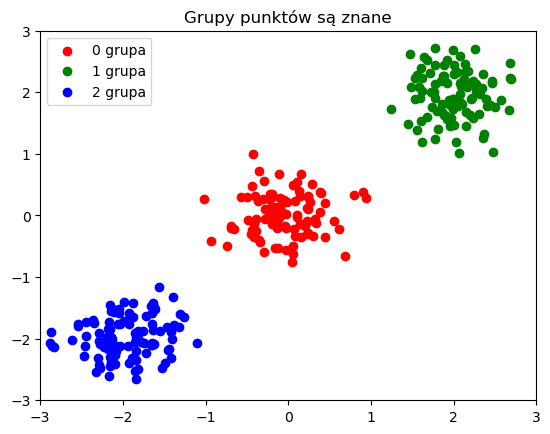

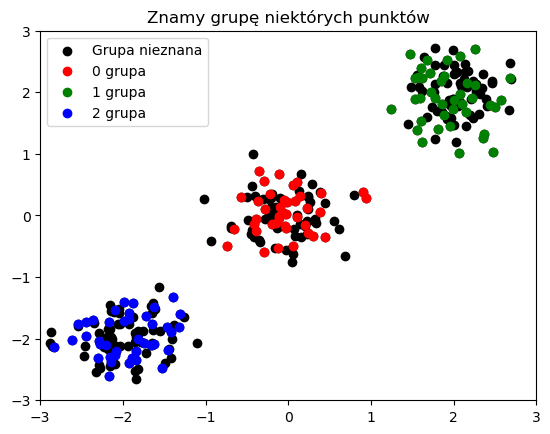

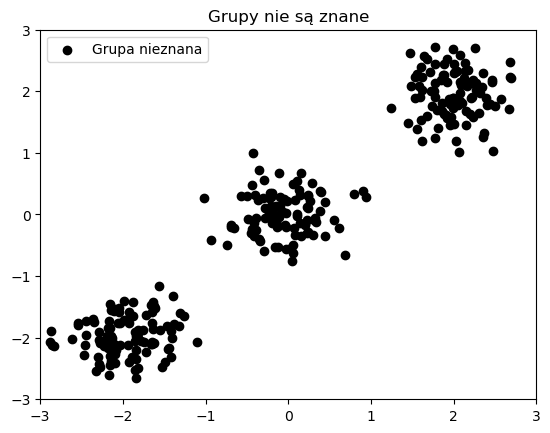

In [ ]:
m_0 = 0  # Zmienne m_0, m_1, m_2 decydują, 
m_1 = 2  # wokół których punktów losujemy grupę 0, 1, 2
m_2 = -2
v = 0.35 # Zmienna v decyduje, jak szeroko rozłożone są losowane punkty

# Dzięki tej linijce, punkty które losujemy za każdym razem będą takie same.
# Jeżeli chcemy przy kolejnych kompilacjach uzyskiwać róże wyniki, należy ją usunąć.
np.random.seed(1000)

# Losujemy punkty
points_from_0_group = np.random.normal(m_0, v, size=(100, 2))
points_from_1_group = np.random.normal(m_1, v, size=(100, 2))
points_from_2_group = np.random.normal(m_2, v, size=(100, 2))

points_from_all_groups = np.concatenate([points_from_0_group, points_from_1_group, points_from_2_group], axis=0)

# Drukujemy, co wylosowaliśmy
fig1, ax1 = plt.subplots()
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.scatter(points_from_0_group[:, 0], points_from_0_group[:, 1], label="0 grupa", c='r')
ax1.scatter(points_from_1_group[:, 0], points_from_1_group[:, 1], label="1 grupa", c='g')
ax1.scatter(points_from_2_group[:, 0], points_from_2_group[:, 1], label="2 grupa", c='b')
ax1.legend()
ax1.set_title("Grupy punktów są znane")

fig2, ax2 = plt.subplots()
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.scatter(points_from_all_groups[:, 0], points_from_all_groups[:, 1], label="Grupa nieznana", c='k')
ax2.scatter(points_from_0_group[:40, 0], points_from_0_group[:40, 1], label="0 grupa", c='r')
ax2.scatter(points_from_1_group[:40, 0], points_from_1_group[:40, 1], label="1 grupa", c='g')
ax2.scatter(points_from_2_group[:40, 0], points_from_2_group[:40, 1], label="2 grupa", c='b')
ax2.set_title("Znamy grupę niektórych punktów")
ax2.legend()

fig3, ax3 = plt.subplots()
ax3.set_xlim([-3, 3])
ax3.set_ylim([-3, 3])
ax3.scatter(points_from_all_groups[:, 0], points_from_all_groups[:, 1], label="Grupa nieznana", c='k')
ax3.set_title("Grupy nie są znane")
ax3.legend()


# Algorytm KNN- K Nearest Neighbours

Jednym z najprostszych algorytmów służących do rozwiązywania problemu klasyfikacji jest KNN. Wygląda on następująco:

### Dla każdego punktu *x*, którego grupy nie znamy:
###     1. Popatrz na K punktów, które są najbliżej *x*;
###     2. Zwróć zgadnięcie, że *x* należy do najliczniejszej grupy spośród punktów z punktu 1.
###

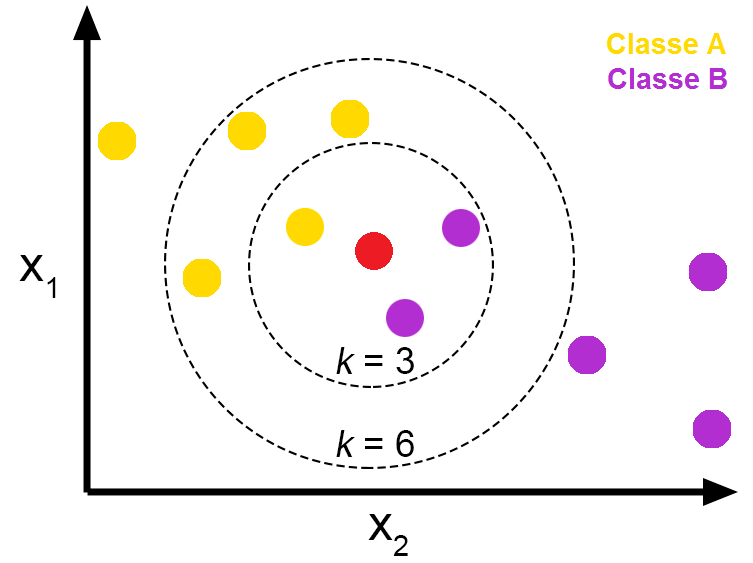

Źródło: https://medium.com/data-science/knn-k-nearest-neighbors-1-a4707b24bd1d

# Uwaga!

Zanim zastosujesz algorytm KNN do próby rozwiązania problemu, należy zastanowić się nad paroma sprawami:
1. Jaką liczbę K wybrać?
2. Jak mierzyć, czy dane punkty są blisko?
3. Czy KNN w ogóle się nadaje?

## Przykład prawdziwych zbiorów danych

### Nr 1. Irysy

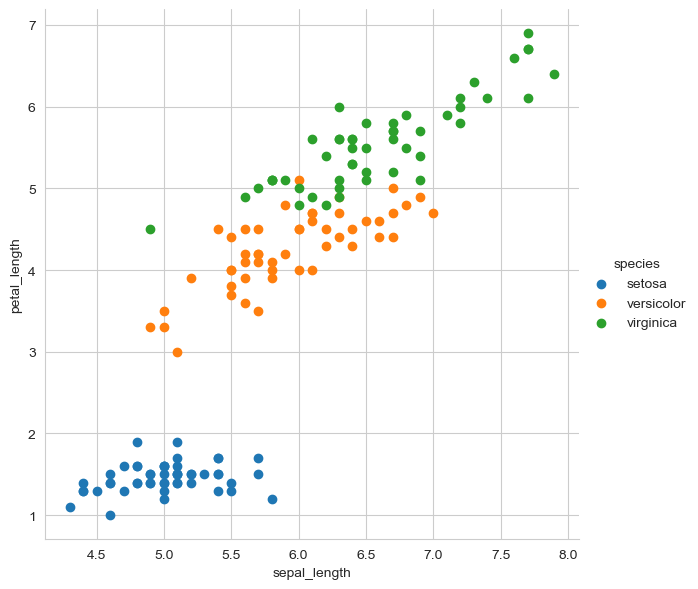

In [ ]:
import seaborn as sns 

iris = sns.load_dataset('iris') 

# style used as a theme of graph 
# for example if we want black 
# graph with grid then write "darkgrid" 
sns.set_style("whitegrid") 

# sepal_length, petal_length are iris 
# feature data height used to define 
# Height of graph whereas hue store the 
# class of iris dataset. 
sns.FacetGrid(iris, hue ="species", 
			height = 6).map(plt.scatter, 
							'sepal_length', 
							'petal_length').add_legend() 


### Nr 2. MNIST

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [22]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(X_trn, y_trn), (X_tst, y_tst) = load_data('mnist.npz')


In [23]:
import matplotlib.pyplot as plt

def plot_digit(x):
    fig = plt.figure(figsize = (2,2))
    plt.imshow(x, cmap='gray')
    plt.show()


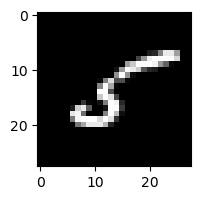

Label: 5


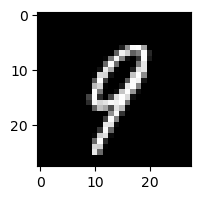

Label: 9


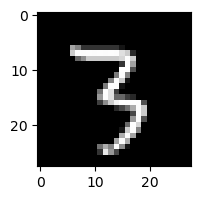

Label: 3


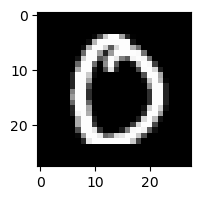

Label: 0


In [24]:
plot_digit(X_trn[11])
print("Label:", y_trn[11])

plot_digit(X_trn[22])
print("Label:", y_trn[22])

plot_digit(X_trn[44])
print("Label:", y_trn[44])

plot_digit(X_trn[88])
print("Label:", y_trn[88])

In [25]:
X_trn[44].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 163, 132,  51,  51,  51,  51,  5

In [26]:
for r in range(28):
    for c in range(28):
        print(1 if X_trn[44,r,c] > 0 else 0, end="")
    print()

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000001111111111000000000000
0000001111111111110000000000
0000000111111111110000000000
0000000000000001110000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000011110000000000000
0000000000011111110000000000
0000000000011111111100000000
0000000000000011111100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000111000000000
0000000000000001111000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000011111100000000000
0000000000011110000000000000
0000000000000000000000000000
0000000000000000000000000000
